# Radiative Processes for Black Holes

## 3. Synchrotron Radiation

This repository contains python functions that are useful for studying synchrotron radiation.

In [1]:
# Turn on autoreload for Jupyter to make developer easier
%load_ext autoreload
%autoreload 2

# Standard library and constants
from math import pi

# Standard python packages
import numpy as np
from matplotlib import pyplot as plt

# Astropy units and constants are extremely powerful
from astropy import units     as u
from astropy import constants as c

Although object oriented programming (OOP) is sometimes overkill for numerical analysis, given that we will need to compare different formulations of synchrotron radiation, it may still be useful to create classes to group functions/methods together.

In OOP, it is possible to declare the required methods in a class without defining them.  Such a class is called an abstract class.  We will use python's builtin Abstract Base Classes package for this.

In [2]:
from abc import ABC, abstractmethod

### 3.1 Planck's law

Since Planck's law
$$
B_\nu = \frac{2 h \nu^3}{c^2} \frac{1}{\exp(h\nu/k_\mathrm{B}T) - 1}
$$
is simple enough, we include it as a concrete method.  Nevertheless, it is possible to override it with better optimized form.

In [3]:
class Radiating(ABC):
    """ Radiating Abstract Base Class """
    
    def __init__(self, rho, T, cos_theta, B, Z=1):
        """ Set fluid property """
        self.rho = rho
        self.T   = T
        self.B   = B
        self.cos = cos_theta
        self.Z   = Z
    
    def Bnu(self, nu):
        """ Planck function """
        x = (c.h * nu) / (c.k_B * self.T)
        f = 2 * c.h * (nu * nu * nu) / (c.c * c.c)
        return f / (np.exp(x) - 1)

    @abstractmethod
    def jnu_bremss(self, nu):
        """ Bremsstrahlung emissivity """
        pass
    
    @abstractmethod
    def jnu_sync(self, nu):
        """ Synchrotron emissivity """
        pass

Note that, because Radiating is an ABC, you cannot instantize it:

In [4]:
disk = Radiating(1e18 * u.g / u.cm**3, 1e10 * u.K, 0, 0)

TypeError: Can't instantiate abstract class Radiating with abstract methods jnu_bremss, jnu_sync

You have to sublass it first:

In [5]:
class Dummy(Radiating):
    def jnu_bremss(self, nu):
        pass
    
    def jnu_sync(self, nu):
        pass
    
disk = Dummy(1e18 * u.g / u.cm**3, 1e10 * u.K, 0, 0)

We may now plot Planck's law:

/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(1e-10, 1e+20)

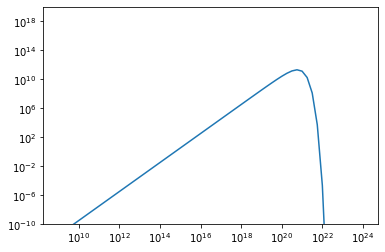

In [6]:
nus = np.logspace(9, 24, 15*4+1) * u.Hz

plt.loglog(nus, disk.Bnu(nus))
plt.ylim(1e-10, 1e20)

### 1.2. Raybinkin-Lightman Formulations

In [7]:
class RL(Radiating):
    def jnu_bremss(self, nu):
        f = (32 * pi * c.e.gauss**6) / (3 * c.m_e * c.c**3) * np.sqrt(2 * pi / (3 * c.k_B * c.m_e))
        ne = self.rho / (c.m_e + c.m_p)
        ni = ne
        return f * np.sqrt(self.T) * self.Z * self.Z * ne * ni * np.exp(- c.h * nu / (c.k_B * self.T))
    
    def jnu_sync(self, nu):
        pass

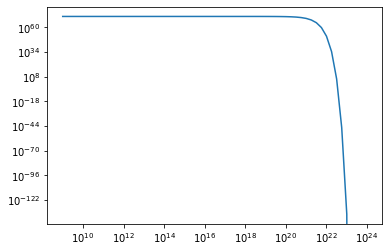

In [8]:
disk_RL = RL(1e18 * u.g / u.cm**3, 1e10 * u.K, 0, 0)

plt.loglog(nus, disk_RL.jnu_bremss(nus))